# Assignment 2: PCA for Dimension Reduction
**Name:** Ayush Chavan  
**Roll No:** 23

# Principal Component Analysis (PCA) for Dimension Reduction

This notebook demonstrates the use of PCA for dimensionality reduction on numerical data. The process includes data standardization, performing PCA, constructing a scree plot, and visualizing the data in a lower-dimensional space.

### 1. Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

### 2. Load and Standardize the Data
We will use the Iris dataset for this demonstration. The data is first loaded and then standardized to have a mean of 0 and a standard deviation of 1. This is a crucial pre-processing step for PCA.

In [2]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a DataFrame for easier visualization
df = pd.DataFrame(X_scaled, columns=iris.feature_names)
df['target'] = y
print("Standardized Data Head:")
print(df.head())

Standardized Data Head:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0          -0.900681          1.019004          -1.340227         -1.315444   
1          -1.143017         -0.131979          -1.340227         -1.315444   
2          -1.385353          0.328414          -1.397064         -1.315444   
3          -1.506521          0.098217          -1.283389         -1.315444   
4          -1.021849          1.249201          -1.340227         -1.315444   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


### 3. Perform Principal Component Analysis (PCA)
We instantiate and fit the PCA model to the standardized data. We will initially keep all components to analyze the explained variance.

In [3]:
# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the principal components
df_pca = pd.DataFrame(data = X_pca, columns = ['PC' + str(i) for i in range(1, X.shape[1] + 1)])
df_pca['target'] = y
print("PCA Transformed Data Head:")
print(df_pca.head())

PCA Transformed Data Head:
        PC1       PC2       PC3       PC4  target
0 -2.264703  0.480027 -0.127706 -0.024168       0
1 -2.080961 -0.674134 -0.234609 -0.103007       0
2 -2.364229 -0.341908  0.044201 -0.028377       0
3 -2.299384 -0.597395  0.091290  0.065956       0
4 -2.389842  0.646835  0.015738  0.035923       0


### 4. Construct the Scree Plot
A scree plot helps to visualize the percentage of variance explained by each principal component. This plot is useful for determining the optimal number of components to retain.

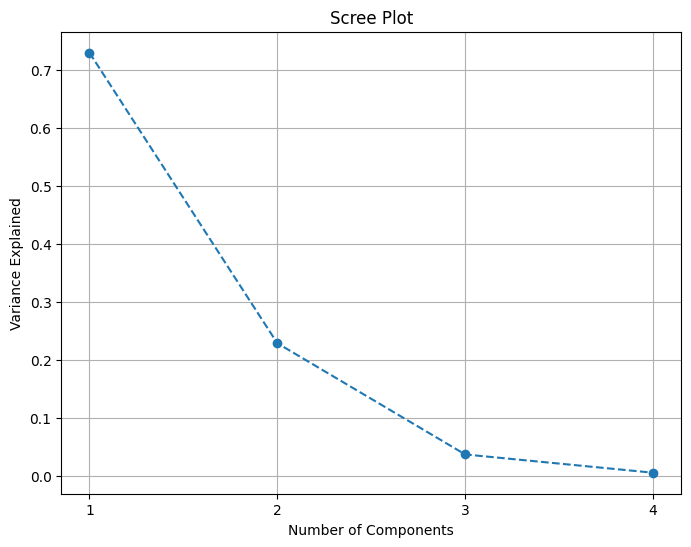

Cumulative Explained Variance: [0.72962445 0.95813207 0.99482129 1.        ]


In [4]:
# Explained variance
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid()
plt.show()

# Cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)
print("Cumulative Explained Variance:", cumulative_variance)

### 5. Visualize Data in 2D Principal Components
We reduce the data to two principal components and create a 2D scatter plot to visualize the transformed data points. The points are color-coded by their class labels to observe class separation.

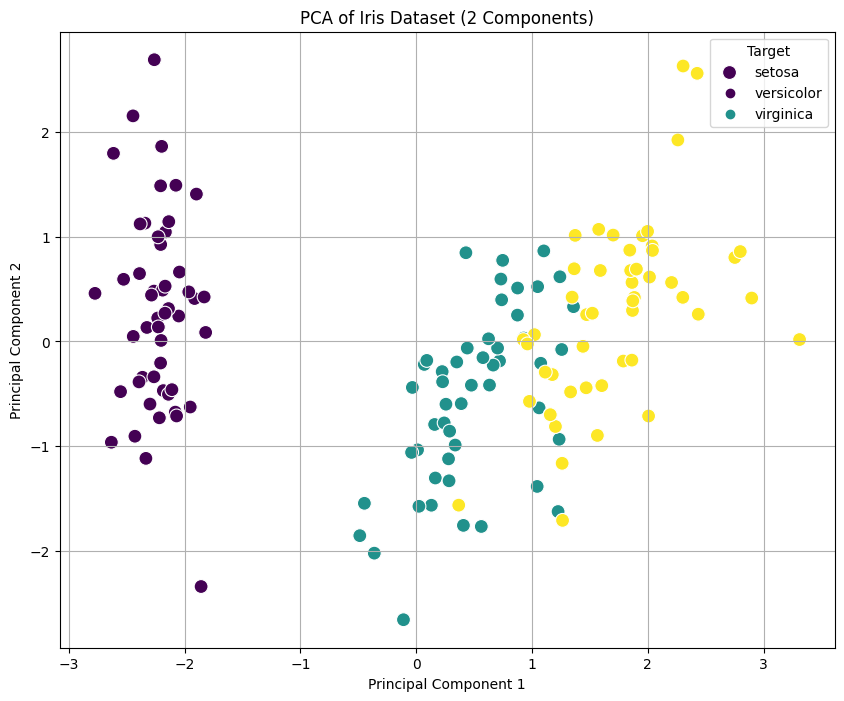

In [5]:
# Reduce to 2 components
pca = PCA(n_components=2)
X_pca_2d = pca.fit_transform(X_scaled)

# Create a DataFrame for the 2D data
df_pca_2d = pd.DataFrame(data = X_pca_2d, columns = ['Principal Component 1', 'Principal Component 2'])
df_pca_2d['target'] = y

# Plot the 2D data
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='target', data=df_pca_2d, palette='viridis', s=100)
plt.title('PCA of Iris Dataset (2 Components)')
plt.legend(title='Target', labels=target_names)
plt.grid()
plt.show()